# Agglomerative Clustering (Bottom-Up)

Agglomerative Clustering is a type of hierarchical clustering technique used to group data points into clusters based on their similarity. It is a bottom-up approach where each data point starts in its own cluster, and pairs of clusters are merged step by step based on certain criteria until all points are grouped into a single cluster or until a stopping condition (like a predefined number of clusters) is met.



###simple explanation:
Imagine you have a bunch of data points, like dots on a piece of paper. At the beginning, each dot is considered its own cluster. Then, the algorithm starts to find the two dots (or clusters) that are closest to each other and merges them into a new, bigger cluster. This process repeats, merging the closest clusters together, one step at a time. It keeps doing this until all the dots are grouped into one big cluster, or until you decide to stop when a certain number of clusters are formed.

##Prepare the sample Data

In [90]:
import numpy as np
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)


In [91]:
print("Randomly generated data points\n\n",X[:5])

Randomly generated data points

 [[2.40122201 0.77268441]
 [0.43899014 4.53592883]
 [2.6236187  0.8046576 ]
 [0.00793137 4.17614316]
 [0.3471383  3.45177657]]


# Visualize the sample data in a scatter plot

<ipython-input-92-c602a61c6cd1>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=None, cmap='viridis', marker='o')


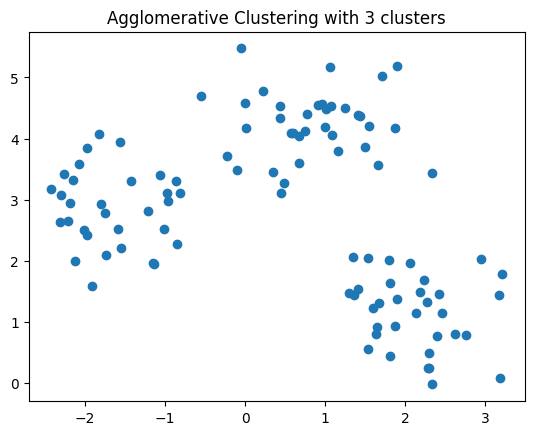

In [92]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=None, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering with 3 clusters')
plt.show()

## Perform Agglomerative Clustering

* n_clusters=None: We set n_clusters to None because we’ll decide the number of clusters later using the dendrogram.
* distance_threshold=0: This parameter is set to 0 so that we can visualize the full merging process.

In [93]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
Agglomerative_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
clusters = Agglomerative_clustering.fit_predict(X)

print("cluster labels of each data points \n\n", clusters)

cluster labels of each data points 

 [53 74 86 73 55 99 91 85 56 96 97 69 95 70 92 51 98 81 50 61 93 72 48 78
 87 59 88 94 80 36 52 77 60 79 65 67 47 90 38 64 58 63 25 83 46 89 71 54
 62 82 45 43 31 34 44 57 49 66 84 22 28 40 21 68 32 33 27 10 15 16 39 35
 26 12 76 42 30 75 23 24 29 37 13  7 14  6 19 41 17 20  9 18 11  4  8  3
  5  2  1  0]


This is not showing the corrct clusters so we need determine the number of clusters using dendrogram

##Visualize the Clustering Process, dendrogram with linkage matrix
* linkage method='ward': This method minimizes the variance of the clusters being merged.
* This is used to find how many clucsters are there.


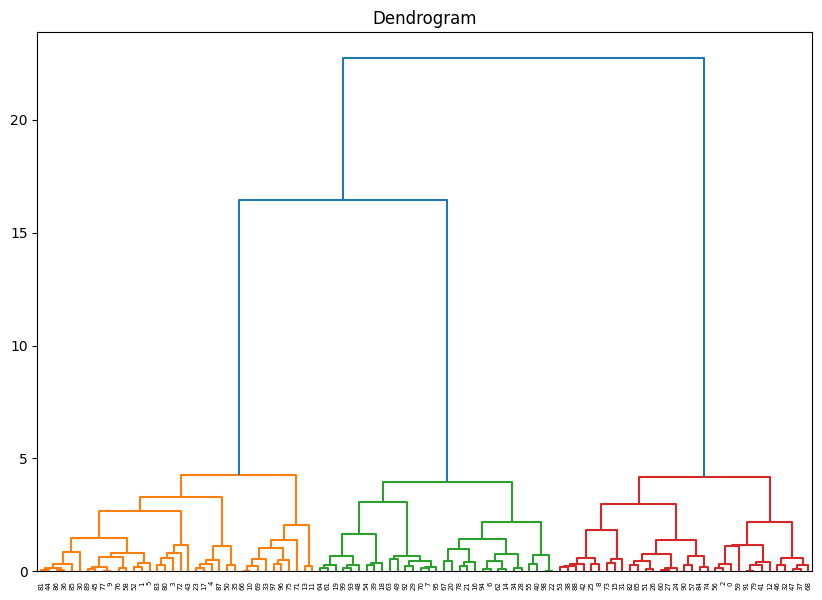

In [94]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
linked = linkage(X, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

## Determine the Number of Clusters
You can determine the number of clusters by visually inspecting the dendrogram and deciding where to cut. For example, if you cut at a certain level, you might end up with 3 clusters.

## Again Perform Agglomerative Clustering

* n_clusters=3: We set n_clusters to 3.

In [95]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_clusters = agg_clustering.fit_predict(X)
print("clusters", agg_clusters)

clusters [1 0 1 0 0 0 2 2 1 0 0 0 1 0 2 1 2 0 2 2 2 2 2 0 1 1 1 1 2 2 0 1 1 0 2 0 0
 1 1 2 2 1 1 0 0 0 1 1 2 2 0 1 0 1 2 2 1 1 0 1 1 2 2 2 2 1 0 2 1 0 2 0 0 1
 1 0 0 0 2 1 0 0 1 0 1 0 0 0 1 0 1 1 2 2 2 2 0 0 2 2]


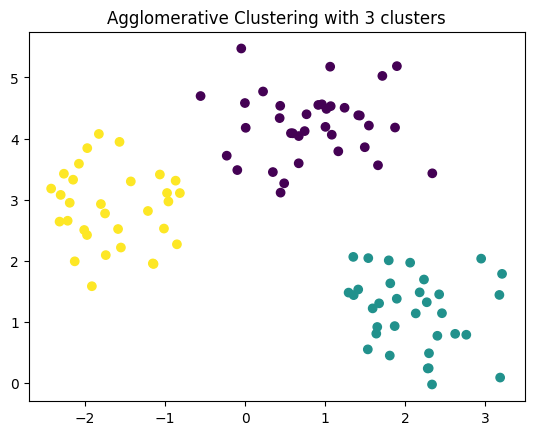

In [96]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=agg_clusters, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering with 3 clusters')
plt.show()

<ipython-input-99-fa1cc38630bd>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(X[:, 0], X[:, 1], c=None, cmap='viridis', marker='o')


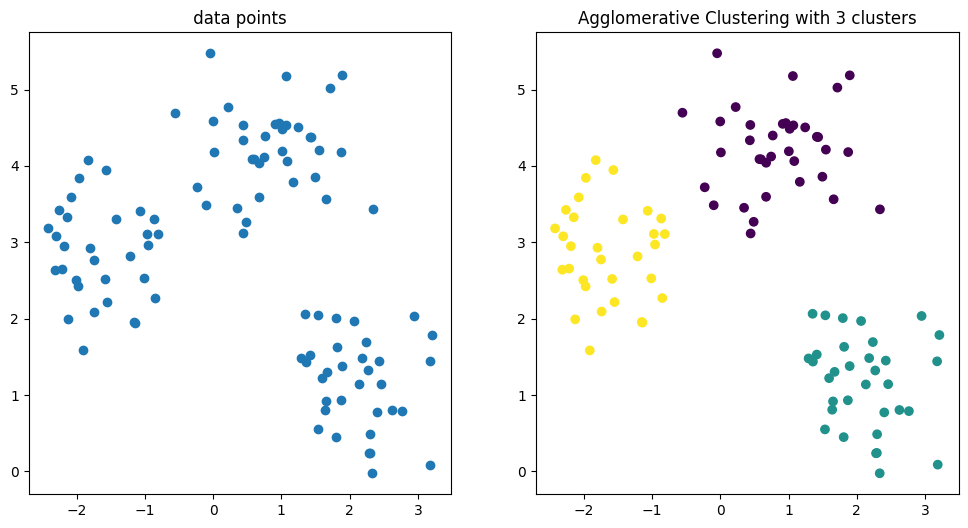

In [99]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot (without cluster colors)
axes[0].scatter(X[:, 0], X[:, 1], c=None, cmap='viridis', marker='o')
axes[0].set_title(' data points ')

# Second scatter plot (with cluster colors)
axes[1].scatter(X[:, 0], X[:, 1], c=agg_clusters, cmap='viridis', marker='o')
axes[1].set_title('Agglomerative Clustering with 3 clusters')

# Show the plots
plt.show()

In [97]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(X, agg_clusters)
print(f'Silhouette Score: {score:.2f}')


Silhouette Score: 0.64


END